<a href="https://colab.research.google.com/github/frikel12/Twitter-Sentiment-Analysis/blob/main/Twitter_Sentiment_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import string
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
import nltk
import re
import multiprocessing
import tensorflow as tf
from sklearn.model_selection import train_test_split
nltk.download("stopwords")

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# 2. Load the Data

In [ ]:
import pandas as pd
# Charger Drive dans Colab
from google.colab import drive

drive.mount('/content/drive')



path='/content/drive/My Drive/Datasets/tweets.csv'
col_names = ["target", "ids", "date", "flag", "user", "text"]

df = pd.read_csv(path,
            encoding = "ISO-8859-1",
            names=col_names)

Mounted at /content/drive


In [ ]:
df.shape

(1600000, 6)

In [ ]:
df = df.sample(200000)
df.head()

,target,ids,date,flag,user,text
1469178,4,2064853441,Sun Jun 07 07:19:47 PDT 2009,NO_QUERY,ReScUeMeGoD,Starbucks for coffee and scones for breakfast ...
1271632,4,2000587177,Mon Jun 01 22:27:31 PDT 2009,NO_QUERY,mirandashines,Honestly I LOVE YOU @RyanSeacrest !!! U r SO h...
415941,0,2061188585,Sat Jun 06 20:21:29 PDT 2009,NO_QUERY,kateadoodle,I couldn't save the baby bird. My cat is such...
381983,0,2052895151,Sat Jun 06 02:26:56 PDT 2009,NO_QUERY,panatlantica,Someone ate all my chocolate
5560,0,1469122802,Tue Apr 07 05:17:31 PDT 2009,NO_QUERY,alecwalker,Argh...throttled to 64k up and down...I know d...


# 3. Explore the Data

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 1469178 to 279747
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   target  200000 non-null  int64 
 1   ids     200000 non-null  int64 
 2   date    200000 non-null  object
 3   flag    200000 non-null  object
 4   user    200000 non-null  object
 5   text    200000 non-null  object
dtypes: int64(2), object(4)
memory usage: 10.7+ MB


In [ ]:
df.shape


(200000, 6)

In [ ]:
df.describe(include='all')


,target,ids,date,flag,user,text
count,200000.000000,2.000000e+05,200000,200000,200000,200000
unique,NaN,NaN,175356,1,148586,199116
top,NaN,NaN,Sat Jun 06 10:59:24 PDT 2009,NO_QUERY,lost_dog,isPlayer Has Died! Sorry
freq,NaN,NaN,7,200000,68,33
mean,2.001280,1.998781e+09,NaN,NaN,NaN,NaN
std,2.000005,1.940346e+08,NaN,NaN,NaN,NaN
min,0.000000,1.467810e+09,NaN,NaN,NaN,NaN
25%,0.000000,1.956824e+09,NaN,NaN,NaN,NaN
50%,4.000000,2.002108e+09,NaN,NaN,NaN,NaN
75%,4.000000,2.177336e+09,NaN,NaN,NaN,NaN


<Axes: xlabel='target', ylabel='count'>

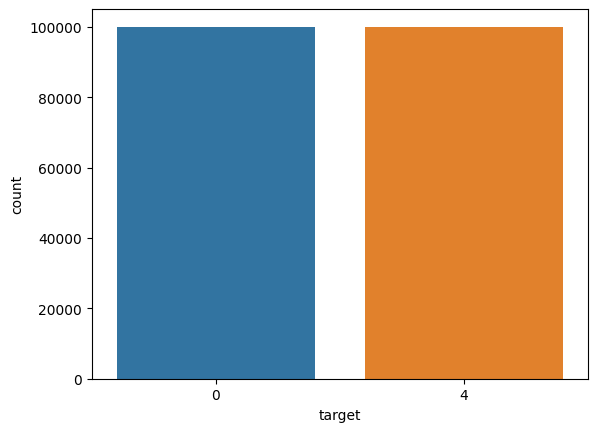

In [ ]:
import seaborn as sns

sns.countplot(x=df['target'])

In [ ]:
df['target'].unique()

array([4, 0])

In [ ]:
df['target'] = df['target'].replace(4, 1)

In [ ]:
df['target'].unique()

array([1, 0])

In [ ]:
df = df.drop(['ids', 'date', 'flag','user'], axis = 1)
df.head()

,target,text
1469178,1,Starbucks for coffee and scones for breakfast ...
1271632,1,Honestly I LOVE YOU @RyanSeacrest !!! U r SO h...
415941,0,I couldn't save the baby bird. My cat is such...
381983,0,Someone ate all my chocolate
5560,0,Argh...throttled to 64k up and down...I know d...


# 4. Preprocessing

In [ ]:
data = df['text']
labels = np.array(df['target'])

In [ ]:
data.iloc[1]

'Honestly I LOVE YOU @RyanSeacrest !!! U r SO hot! '

In [ ]:
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

def split_into_words(text):
    words = text.split()
    return words

def to_lower_case(words):
    words = [word.lower() for word in words]
    return words

def remove_punctuation(words):
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    stripped = [re_punc.sub('', w) for w in words]
    return stripped

def keep_alphabetic(words):
    words = [word for word in words if word.isalpha()]
    return words

def remove_stopwords(words):
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    return words

def to_sentence(words):
    return ' '.join(words)

def tweet(words):
    tweet_tokenizer = nltk.tokenize.TweetTokenizer(strip_handles=True,reduce_len=True)
    tweet = tweet_tokenizer.tokenize(words)
    return tweet


def denoise_text(text):
    words = split_into_words(text)
    words = to_lower_case(words)
    words = remove_punctuation(words)
    words = keep_alphabetic(words)
    words = remove_stopwords(words)
    return to_sentence(words)


In [ ]:
data = data.apply(denoise_text)

In [ ]:
print('Before: {}'. format(list(df['text'][:2])))
print('---')
print('After: {}'. format(list(data[:2])))

Before: ['Starbucks for coffee and scones for breakfast this morning.  yaaay!', 'Honestly I LOVE YOU @RyanSeacrest !!! U r SO hot! ']
---
After: ['starbucks coffee scones breakfast morning yaaay', 'honestly love ryanseacrest u r hot']


In [ ]:
X_train, X_test, y_train, y_test = test = train_test_split(data, labels,test_size=0.20,
                                                           random_state=1,
                                                           stratify = labels)

In [ ]:
tokenizer = Tokenizer(num_words=10000, oov_token = '<OOV>')
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
VOCAB_SIZE = len(word_index)+1
VOCAB_SIZE

137162

In [ ]:
maxlen = max([len(x) for x in X_train])
maxlen = 50

In [ ]:
train_sequences = tokenizer.texts_to_sequences(X_train)
train_padded_sequences = pad_sequences(train_sequences,maxlen=maxlen,padding='post',truncating='post')
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded_sequences = pad_sequences(test_sequences,maxlen=maxlen,padding='post',truncating='post')

In [ ]:
len(train_padded_sequences[6])


50

# 5. Data Modeling

In [ ]:
embedding_dim = 32

In [ ]:
model = tf.keras.Sequential([
        tf.keras.layers.Embedding(VOCAB_SIZE+1, embedding_dim, input_length=maxlen),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.30),
        tf.keras.layers.Dense(embedding_dim,activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.30),
        tf.keras.layers.Dense(8,activation='relu'),
        tf.keras.layers.Dense(1,activation='sigmoid'),
    ])

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 32)            4389216   
                                                                 
 bidirectional (Bidirection  (None, 32)                6272      
 al)                                                             
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 batch_normalization (Batch  (None, 32)                128       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 32)                1

In [ ]:
history = model.fit(train_padded_sequences, y_train,
                       validation_split=0.2,
                       epochs = 5)

Epoch 1/5
4000/4000 [==============================] - 78s 16ms/step - loss: 0.5522 - accuracy: 0.7171 - val_loss: 0.5621 - val_accuracy: 0.7355
Epoch 2/5
4000/4000 [==============================] - 51s 13ms/step - loss: 0.4796 - accuracy: 0.7720 - val_loss: 0.5498 - val_accuracy: 0.7381
Epoch 3/5
4000/4000 [==============================] - 47s 12ms/step - loss: 0.4518 - accuracy: 0.7857 - val_loss: 0.4986 - val_accuracy: 0.7573
Epoch 4/5
4000/4000 [==============================] - 50s 12ms/step - loss: 0.4268 - accuracy: 0.7990 - val_loss: 0.4916 - val_accuracy: 0.7693
Epoch 5/5
4000/4000 [==============================] - 47s 12ms/step - loss: 0.4022 - accuracy: 0.8116 - val_loss: 0.4898 - val_accuracy: 0.7656


In [ ]:
print(X_test.iloc[99],'label: ;',y_test[99])

manottistreet chea got boo lovin lol label: ; 1


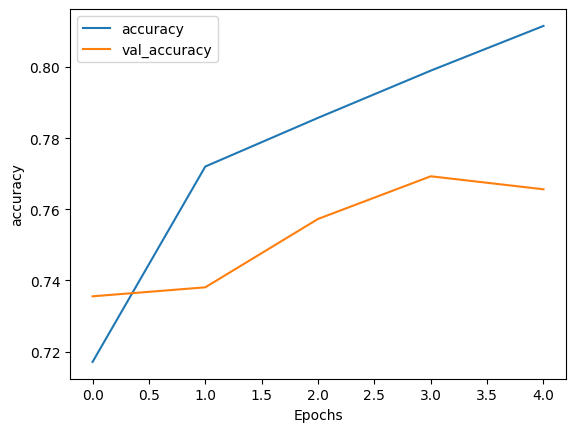

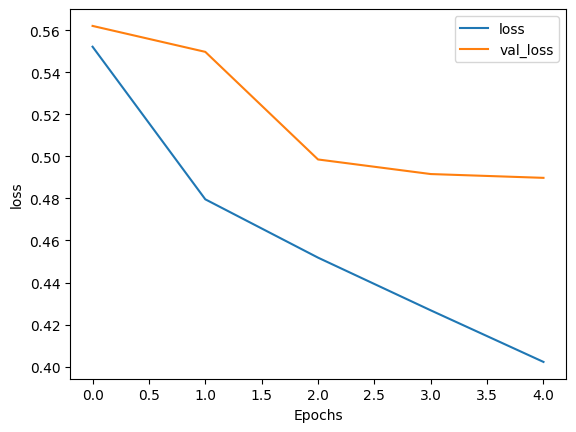

In [ ]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(model, string):
    plt.plot(model.history[string])
    plt.plot(model.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

# Plot the accuracy and loss
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

1250/1250 [==============================] - 9s 7ms/step


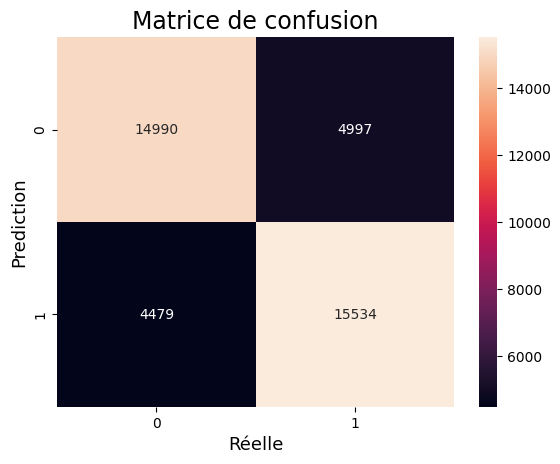

In [ ]:
predicted_test=model.predict(test_padded_sequences)
predicted_test = np.round(predicted_test)

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,predicted_test)


sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['0','1'],
            yticklabels=['0','1'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Réelle',fontsize=13)
plt.title('Matrice de confusion',fontsize=17)
plt.show()

In [ ]:
from sklearn.metrics import classification_report
rapport = classification_report(y_test,predicted_test)

print('Rapport de Classification : \n',rapport)


import sklearn.metrics as metrics
print("Accuracy: ", metrics.accuracy_score(y_test, predicted_test))
print("Recall : ", metrics.recall_score(y_test, predicted_test, average='macro'))
print("Precision: ", metrics.precision_score(y_test, predicted_test, average='macro'))
print("F1 score: ", metrics.f1_score(y_test, predicted_test, average='macro'))

Rapport de Classification : 
               precision    recall  f1-score   support

           0       0.77      0.75      0.76     19987
           1       0.76      0.78      0.77     20013

    accuracy                           0.76     40000
   macro avg       0.76      0.76      0.76     40000
weighted avg       0.76      0.76      0.76     40000

Accuracy:  0.7631
Recall :  0.7630914824061513
Precision:  0.7632769558343601
F1 score:  0.7630561748701039


In [ ]:
model.save('SentimentModel')
model.save_weights("Model Weights")

INFO:tensorflow:Assets written to: SentimentModel\assets


INFO:tensorflow:Assets written to: SentimentModel\assets
